<a href="https://colab.research.google.com/github/Rakesh-Nagaraju/Analysis-of-ML-algorithms-for-accurate-Breast-Cancer-Classification/blob/master/Breast%20Cancer%20Cell%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import smtplib

server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
server.login("rakenju@gmail.com", "2180user")
server.sendmail(
  "rakenju@gmail.com", 
  "rakenju@gmail.com", 
  "this message is from python")
server.quit()

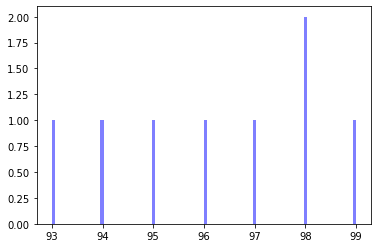

In [ ]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = [98,97,96,95,94,93,98,99]
num_bins = 100
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!pip3 install keras

In [ ]:
# coding=utf-8
#%matplotlib inline
#Breast Cancer Cell classification
#Author: Rakesh Nagaraju (014279304) 
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy import interp
from keras.optimizers import SGD
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from inspect import signature
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Main class
class Machine_Learning_Algorithm():
 def __init__(self):
   self.colors = ['brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue',  'crimson',
    'cyan', 'cornsilk', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki','darkblue', 'darkmagenta', 'darkolivegreen',
    'darkorange', 'goldenrod', 'gray', 'yellow','burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue',  'crimson',
    'cyan', 'cornsilk', 'darkcyan']
   self.reversed_mean_precision = 0.0
   self.mean_fpr = np.linspace(0, 1, 100)
   self.mean_recall = np.linspace(0, 1, 100)
   self.Scores = []
   self.Pre_recall_list = []
   self.tprs=[]
   self.Tprs=[]
   self.aucs=[]
   self.Mean_auc = []
   self.FP_TPR = []
   self.aucc = []

#importing our cancer dataset
 def import_data(self,file_name):
  self.dataset = pd.read_csv(file_name)
  self.X = self.dataset.iloc[:, 2:32].values
  self.Y = self.dataset.iloc[:, 1].values

#Remove Headers, Store True Classification Scores of each record, Scale every values columnwise. 
 def classify_data(self): 
  self.dataset.head()       
  #print("Cancer data set dimensions : {}".format(dataset.shape))
##We can find any missing or null data points of the data set (if there is any)
## using the following pandas function.
  self.z = self.dataset.isnull().sum()
  self.z1 = self.dataset.isna().sum()
##Encoding categorical data values
#Malware is 1 and Benign is 0
  self.labelencoder_Y = LabelEncoder()
  self.Y = self.labelencoder_Y.fit_transform(self.Y)

#Function to predict the trained model
 def predict_trained_model(self,name,X_test,Y_test):
  self.X_test = X_test
  self.Y_test = Y_test
  self.name = name 
  self.Y_pred = self.classifier.predict(X_test) 
  self.Scores.append((self.d).score(X_test,Y_test))
  self.Y_pred = [ 1 if i>=0.5 else 0 for i in self.Y_pred]
  self.Confusion_Matrix() 
  self.roc_cal()
  self.PR_cal()

#Generate Confusion Matrix
 def Confusion_Matrix(self):
  self.confusion_matrix = confusion_matrix(self.Y_test, self.Y_pred)  
  self.classify_report = classification_report(self.Y_test, self.Y_pred)  
  print("Confusion Matrix on",self.name,"for fold",self.i,":\n" +format(self.confusion_matrix)) 
  print("Classification Report on",self.name,"for fold",self.i,":\n" +format(classification_report(self.Y_test, self.Y_pred)))
  print("Accuracy of",self.name,"for fold",self.i,":\n" +format(balanced_accuracy_score(self.Y_test, self.Y_pred)))
  self.average_precision = average_precision_score(self.Y_test, self.Y_pred)

   # Compute ROC curve and area the curve
 def roc_cal(self):
    self.result1 = roc_auc_score(self.Y_test, self.Y_pred)   
    self.fpr, self.tpr, self.thresholds = roc_curve(self.Y_test, self.Y_pred)
    self.tprs.append(interp(self.mean_fpr, self.fpr, self.tpr))
    self.tprs[-1][0] = 0.0
    self.roc_auc = auc(self.fpr, self.tpr)
    self.aucs.append(self.roc_auc)
    self.FP_TPR.append(self.fpr)
    self.FP_TPR.append(self.tpr)
    self.FP_TPR.append(self.i)
    self.FP_TPR.append(self.roc_auc)

 def roc_plot(self):
   plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
   for j in range(0,len(self.FP_TPR),4):
    plt.plot(self.FP_TPR[j], self.FP_TPR[j+1], lw=1,color=self.colors[j], alpha=0.4,
             label='ROC fold for %d (AUC = %0.2f)' % (self.FP_TPR[j+2], self.FP_TPR[j+3]))
   plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
   self.mean_tpr = np.mean(self.tprs, axis=0)
   self.mean_tpr[-1] = 1.0
   self.mean_auc = auc(self.mean_fpr, self.mean_tpr)
   self.std_auc = np.std(self.aucs) 
   plt.plot(self.mean_fpr, self.mean_tpr, color='b',
          label=r'Mean ROC for (AUC = %0.2f)' % (self.mean_auc),lw=2, alpha=.5)
                 # label=r'Mean ROC for (AUC = %0.2f $\pm$ %0.2f)' % (self.mean_auc, self.std_auc),lw=2, alpha=.5)  
   self.std_tpr = np.std(self.tprs, axis=0)
   plt.xlim([0.0, 1.0])
   plt.ylim([0.0, 1.0])
   plt.xlabel('FPR (False Positive Rate)')
   plt.ylabel('TPR (True Positive Rate)')
   plt.title('ROC for '+str(self.name))
   plt.legend(loc="lower right")
   plt.show()
#Remove data when processing is done!!!
 def recycle(self):
   self.Scores.clear()
   self.Pre_recall_list.clear()
   self.tprs.clear()
   self.Tprs.clear()
   self.aucs.clear()
   self.Mean_auc.clear()
   self.FP_TPR.clear()
   self.aucc.clear()

# Compute PR curve and area the curve
 def PR_cal(self):
  self.precision, self.recall,_ = precision_recall_curve(self.Y_test, self.Y_pred)
  self.reversed_recall = np.fliplr([self.recall])[0]
  self.reversed_precision = np.fliplr([self.precision])[0]
  self.reversed_mean_precision += interp(self.mean_recall, self.reversed_recall, self.reversed_precision)
  self.reversed_mean_precision[0] = 0.0
  self.Mean_auc.append(metrics.auc(self.recall, self.precision))
  self.f1_score = f1_score(self.Y_test, self.Y_pred)
  self.PR_auc = auc(self.recall, self.precision)
  self.Tprs.append(interp(self.mean_recall, self.recall, self.precision))
  self.Tprs[-1][0] = 1.0
  self.Pre_recall_list.append(self.precision)
  self.Pre_recall_list.append(self.recall)
  self.Pre_recall_list.append(self.i)
  self.Pre_recall_list.append(self.f1_score)
  self.Pre_recall_list.append(self.PR_auc)
 
 def plot_PR_curve(self):
  plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
  self.reversed_mean_precision /= split
  self.reversed_mean_precision[0] = 1
  self.mean_auc_pr = auc(self.mean_recall, self.reversed_mean_precision)
  c = 0
  for j in range(0,len(self.Pre_recall_list),5):
   plt.plot(self.Pre_recall_list[j], self.Pre_recall_list[j+1],lw=2,color=self.colors[c], 
   label='PR curve for fold %d (AUC = %0.2f) '%(self.Pre_recall_list[j+2],self.Pre_recall_list[j+4]),alpha=.3)
   c += 1 
  plt.plot(self.mean_recall,  self.reversed_mean_precision, 'k--',
         label='Mean precision (AUC mean = %0.2f)' % self.mean_auc_pr,color = 'b',lw=2)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('Recall')
  plt.ylabel('Precison')
  plt.title(' PR curve for '+str(self.name))
  plt.legend(loc="lower right")
  plt.show()
  self.recycle()

#Using SVC method of svm class to use Support Vector Machine Algorithm
 def SVC_algo_linear(self,i,X_train,Y_train,X_test,Y_test):
  self.i = i
  print("Performing SVC with Linear Kernel...")
  self.classifier = SVC(kernel = 'linear', random_state = 0,C = 3, probability=True)
  self.d = self.classifier.fit(X_train, Y_train)
  self.predict_trained_model('SVC-linear',X_test,Y_test)

#Using SVC method of svm class to use Kernel SVM Algorithm
 def SVC_algo_rbf(self,i,X_train,Y_train,X_test,Y_test):
  self.i = i
  print("Performing SVC with RBF Kernel...")
  self.classifier = SVC(kernel = 'rbf', random_state = 0,C = 3, probability=True)
  self.d = self.classifier.fit(X_train, Y_train)
  self.predict_trained_model('SVC-rbf',X_test,Y_test)

#Using SVC method of svm class to use Kernel SVM Algorithm
 def SVC_algo_poly(self,i,X_train,Y_train,X_test,Y_test):
  self.i = i
  print("Performing SVC with Polynomial Kernel...")
  self.classifier = SVC(kernel = 'poly', random_state = 0,C = 3, probability=True)
  self.d = self.classifier.fit(X_train, Y_train)
  self.predict_trained_model('SVC-polynomial',X_test,Y_test)

#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
 def Knn_algo(self,j,i,X_train,Y_train,X_test,Y_test):
  self.i = i
  print("Performing Knn Algorithm...")
  self.classifier = KNeighborsClassifier(n_neighbors = j, metric = 'minkowski', p = 2)
  self.d = self.classifier.fit(X_train, Y_train)
  self.predict_trained_model('Knn',X_test,Y_test)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
 def random_forest(self,i,X_train,Y_train,X_test,Y_test):
  self.i = i
  print("Performing Random Forest...")
  self.classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  self.d = self.classifier.fit(X_train, Y_train)
  self.predict_trained_model('Random Forest',X_test,Y_test)

#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
 def gaussian_algo(self,i,X_train,Y_train,X_test,Y_test):
  self.i = i
  print("Performing Gaussian Algorithm...")
  self.classifier = GaussianNB()
  self.d = self.classifier.fit(X_train, Y_train)
  self.predict_trained_model('Gaussian Algorithm',X_test,Y_test)

#Using Logistic Regression Algorithm to the Training Set
 def logistic_regression(self,i,X_train,Y_train,X_test,Y_test):
  self.i = i
  print("Performing Logistic Regression...")
  self.classifier = LogisticRegression(penalty = 'l2',solver='lbfgs',random_state = 0,max_iter = 1000)
  self.d = self.classifier.fit(X_train, Y_train)
  self.predict_trained_model('Logistic Regression',X_test,Y_test)

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
 def decision_tree(self,i,X_train,Y_train,X_test,Y_test):
  self.i = i
  print("Performing Decision Tree...")
  self.classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  self.d = self.classifier.fit(X_train, Y_train)
  self.predict_trained_model('Decision Tree',X_test,Y_test)

#A Multilayer Perceptron with 2 hidden layers
 def neural_net(self,i,X_train,Y_train,X_test,Y_test):
  self.i = i
  self.name = 'Neural Network'
  print("Training Neural Network...")
  self.classifier = Sequential()  
  self.classifier.add(Dense(units = 5, activation = 'relu', input_dim=30))
  #self.classifier.add(Dense(units = 7, activation = 'relu'))
  self.classifier.add(Dense(units = 3, activation = 'relu'))
  self.classifier.add(Dense(units = 1, activation = 'sigmoid'))
  self.sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
  self.classifier.compile(optimizer = self.sgd, loss = 'mean_squared_error', metrics=['accuracy'])
  self.classifier.fit(X_train, Y_train, batch_size = 10, epochs = 1000)
  self.Y_pred = self.classifier.predict(X_test) 
  self.Y_pred = [ 1 if i>=0.5 else 0 for i in self.Y_pred]
  self.confusion_matrix = confusion_matrix(Y_test, self.Y_pred)  
  self.classify_report = classification_report(Y_test, self.Y_pred)  
  print("Confusion Matrix on",self.name,"for fold",self.i,":\n" +format(self.confusion_matrix)) 
  print("Classification Report on",self.name,"for fold",self.i,":\n" +format(classification_report(Y_test, self.Y_pred)))
  print("Accuracy of",self.name,"for fold",self.i,":\n" +format(balanced_accuracy_score(Y_test, self.Y_pred)))
  tmp = balanced_accuracy_score(Y_test, self.Y_pred)
  self.aucc.append(tmp)
  self.result1 = roc_auc_score(Y_test, self.Y_pred)   
  self.fpr, self.tpr, self.thresholds = roc_curve(Y_test, self.Y_pred)
  self.tprs.append(interp(self.mean_fpr, self.fpr, self.tpr))
  self.tprs[-1][0] = 0.0
  self.roc_auc = auc(self.fpr, self.tpr)
  self.aucs.append(self.roc_auc)
  self.FP_TPR.append(self.fpr)
  self.FP_TPR.append(self.tpr)
  self.FP_TPR.append(self.i)
  self.FP_TPR.append(self.roc_auc)
  self.precision, self.recall,_ = precision_recall_curve(Y_test, self.Y_pred)
  self.reversed_recall = np.fliplr([self.recall])[0]
  self.reversed_precision = np.fliplr([self.precision])[0]
  self.reversed_mean_precision += interp(self.mean_recall, self.reversed_recall, self.reversed_precision)
  self.reversed_mean_precision[0] = 0.0
  self.Mean_auc.append(metrics.auc(self.recall, self.precision))
  self.f1_score  = f1_score(Y_test, self.Y_pred)
  self.PR_auc = auc(self.recall, self.precision)
  self.Tprs.append(interp(self.mean_recall, self.recall, self.precision))
  self.Tprs[-1][0] = 1.0
  self.Pre_recall_list.append(self.precision)
  self.Pre_recall_list.append(self.recall)
  self.Pre_recall_list.append(self.i)
  self.Pre_recall_list.append(self.f1_score)
  self.Pre_recall_list.append(self.PR_auc)

#main function
def main_call(num):
 impl = Machine_Learning_Algorithm()
 impl.import_data("data.csv")
 impl.classify_data()
 kf = KFold(n_splits=split) # Defining the split  
 kf.get_n_splits(impl.X) # returns the number of splitting iterations in the cross-validator
 KFold(n_splits=split, random_state=None, shuffle=False)
 i = 0
 for train_index, test_index in kf.split(impl.X):
   X_train, X_test = impl.X[train_index], impl.X[test_index]
   Y_train, Y_test = impl.Y[train_index], impl.Y[test_index]
#Scaling
   stand_scale = StandardScaler()
   X_train = stand_scale.fit_transform(X_train)
   X_test = stand_scale.transform(X_test)
   if (num == 1): impl.logistic_regression(i,X_train,Y_train,X_test,Y_test)
   elif (num == 2): impl.Knn_algo(k,i,X_train,Y_train,X_test,Y_test)
   elif (num == 310): impl.SVC_algo_linear(i,X_train,Y_train,X_test,Y_test)
   elif (num == 311): impl.SVC_algo_rbf(i,X_train,Y_train,X_test,Y_test)
   elif (num == 312): impl.SVC_algo_poly(i,X_train,Y_train,X_test,Y_test)  
   elif (num == 4): impl.gaussian_algo(i,X_train,Y_train,X_test,Y_test)
   elif (num == 5): impl.decision_tree(i,X_train,Y_train,X_test,Y_test)
   elif (num == 6): impl.random_forest(i,X_train,Y_train,X_test,Y_test)
   elif (num == 7): impl.neural_net(i,X_train,Y_train,X_test,Y_test)
   else: break
   i += 1
 if (num != 7):
  print("Average mean accuracy of all for",impl.name,"is = ",np.mean(impl.Scores))
 else:
   print("Average mean accuracy of all for Neural Network is:",(sum(impl.aucc)/len(impl.aucc))*100)
 impl.roc_plot()
 impl.plot_PR_curve()
 return()
def analyze_data():
  # read the file
  data = pd.read_csv('data.csv')
  # Checking the data set
  data.head()
  # Cleaning and modifying the data
  data = data.drop('id',axis=1)
  data = data.drop('Unnamed: 32',axis=1)
  # Mapping Benign to 0 and Malignant to 1 
  data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
  #Check the data stats
  data.describe()
  # Scaling the dataset
  datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
  datas.columns = list(data.iloc[:,1:32].columns)
  datas['diagnosis'] = data['diagnosis']
  datas.head() 

 #draw a heatmap between mean features and diagnosis
  features_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
  plt.figure(figsize=(14,14))
  heat = sns.heatmap(datas[features_mean].corr(),square=True, vmax=1, annot=True,fmt='f')

   # Splitting the dataset into malignant and benign.
  dataMalignant=datas[datas['diagnosis'] ==1]
  dataBenign=datas[datas['diagnosis'] ==0]

  #Plotting these features as a histogram
  fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(15,60))
  for idx,ax in enumerate(axes):
     ax.figure
     binwidth= (max(datas[features_mean[idx]]) - min(datas[features_mean[idx]]))/250
     ax.hist([dataMalignant[features_mean[idx]],dataBenign[features_mean[idx]]], bins=np.arange(min(datas[features_mean[idx]]), max(datas[features_mean[idx]]) + binwidth, binwidth) , density=True, alpha=0.5,stacked=True, label=['M','B'],color=['r','g'])
     ax.legend(loc='upper right')
     ax.set_title(features_mean[idx])
  plt.show()
#Menu displayed at the start.
print("Welcome!!!")
print("Loaded Wisconsin Breast Cancer Dataset")
print("Enter the number given below to run preferred Algorithm:")
print("0.Analyze data\n1.Logistic Regression\n2.Knn\n3.SVC\n4.Gaussian Algorithm\n5.Decision Tree\n6.Random Forest\n7.Neural Network\n8.ALL the above")
val = int(input("Input Algorithm number:"))
if val ==0 :
  analyze_data()
else:
 try:
  splt = int(input("Enter number of splits(default=5):"))
  if splt > 29:
   print("Entered value is greater...assuming default folds(5)")
   split = 5
  else:split = splt
 except:
  print("Invalid value....assuming default folds(5)")
  split =  5
 if val == 2:
   for k in range(1,30):
     main_call(val)
 if(val == 3):
  main_call(310)
  main_call(311)
  main_call(312)
 elif(val == 8):
  for i in range(1,8):
    if(i == 3):
      main_call(310)
      main_call(311)
      main_call(312)
    else:main_call(i)
 else:main_call(val)
#END#



In [ ]:
import numpy
import matplotlib.pyplot as plt

X = numpy.array([
        [1.0,5.0],
        [1.25,5.35],
        [1.25,5.75],
        [1.5,6.25],
        [1.75,6.75],
        [2.0,6.5],
        [3.0,7.75],
        [3.5,8.25],
        [3.75,8.75],
        [3.95,9.1],
        [4.0,8.5],
        [2.5,7.25],
        [2.25,7.75],
        [2.0,6.5],
        [2.75,8.25],
        [4.5,8.9],
        [9.0,5.0],
        [8.75,5.85],
        [9.0,6.25],
        [8.0,7.0],
        [8.5,6.25],
        [8.5,6.75],
        [8.25,7.65],
        [7.0,8.25],
        [6.0,8.75],
        [5.5,8.25],
        [5.25,8.75],
        [4.9,8.75],
        [5.0,8.5],
        [7.5,7.75],
        [7.75,8.25],
        [6.75,8.0],
        [6.25,8.25],
        [4.5,8.9],
        [5.0,1.0],
        [1.25,4.65],
        [1.25,4.25],
        [1.5,3.75],
        [1.75,3.25],
        [2.0,3.5],
        [3.0,2.25],
        [3.5,1.75],
        [3.75,8.75],
        [3.95,0.9],
        [4.0,1.5],
        [2.5,2.75],
        [2.25,2.25],
        [2.0,3.5],
        [2.75,1.75],
        [4.5,1.1],
        [5.0,9.0],
        [8.75,5.15],
        [8.0,2.25],
        [8.25,3.0],
        [8.5,4.75],
        [8.5,4.25],
        [8.25,3.35],
        [7.0,1.75],
        [8.0,3.5],
        [6.0,1.25],
        [5.5,1.75],
        [5.25,1.25],
        [4.9,1.25],
        [5.0,1.5],
        [7.5,2.25],
        [7.75,2.75],
        [6.75,2.0],
        [6.25,1.75],
        [4.5,1.1],
        [3.0,4.5],
        [7.0,4.5],
        [5.0,3.0],
        [4.0,3.35],
        [6.0,3.35],
        [4.25,3.25],
        [5.75,3.25],
        [3.5,3.75],
        [6.5,3.75],
        [3.25,4.0],
        [6.75,4.0],
        [3.75,3.55],
        [6.25,3.55],
        [4.75,3.05],
        [5.25,3.05],
        [4.5,3.15],
        [5.5,3.15],
        [4.0,6.5],
        [4.0,6.75],
        [4.0,6.25],
        [3.75,6.5],
        [4.25,6.5],
        [4.25,6.75],
        [3.75,6.25],
        [6.0,6.5],
        [6.0,6.75],
        [6.0,6.25],
        [5.75,6.75],
        [5.75,6.25],
        [6.25,6.75],
        [6.25,6.25],
        [9.5,9.5],
        [2.5,9.5],
        [1.0,8.0]])

def MyDBSCAN(D, eps, MinPts):
      
    labels = [0]*len(D)
    C = 0
    for P in range(0, len(D)):
        if not (labels[P] == 0):
           continue
        NeighborPts = regionQuery(D, P, eps)
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        else: 
           C += 1
           labels[P] = C
           growCluster(D, labels, P, C, eps, MinPts)
    return labels


def growCluster(D, labels, P, C, eps, MinPts):
    """
    Grow a new cluster with label `C` from the seed point `P`.
    
    This function searches through the dataset to find all points that belong
    to this new cluster. When this function returns, cluster `C` is complete.
    
    Parameters:
      `D`      - The dataset (a list of vectors)
      `labels` - List storing the cluster labels for all dataset points
      `P`      - Index of the seed point for this new cluster
      `C`      - The label for this new cluster.  
      `eps`    - Threshold distance
      `MinPts` - Minimum required number of neighbors
    """

    # SearchQueue is a FIFO queue of points to evaluate. It will only ever 
    # contain points which belong to cluster C (and have already been labeled
    # as such).
    #
    # The points are represented by their index values (not the actual vector).
    #
    # The FIFO queue behavior is accomplished by appending new points to the
    # end of the list, and using a while-loop rather than a for-loop.
    SearchQueue = [P]

    # For each point in the queue:
    #   1. Determine whether it is a branch or a leaf
    #   2. For branch points, add their unclaimed neighbors to the search queue
    i = 0
    while i < len(SearchQueue):    
        
        # Get the next point from the queue.        
        P = SearchQueue[i]

        # Find all the neighbors of P
        NeighborPts = regionQuery(D, P, eps)
        
        # If the number of neighbors is below the minimum, then this is a leaf
        # point and we move to the next point in the queue.
        if len(NeighborPts) < MinPts:
            i += 1
            continue
        
        # Otherwise, we have the minimum number of neighbors, and this is a 
        # branch point.
            
        # For each of the neighbors...
        for Pn in NeighborPts:
           
            # If Pn was labelled NOISE during the seed search, then we
            # know it's not a branch point (it doesn't have enough 
            # neighbors), so make it a leaf point of cluster C and move on.
            if labels[Pn] == -1:
               labels[Pn] = C
            # Otherwise, if Pn isn't already claimed, claim it as part of
            # C and add it to the search queue.   
            elif labels[Pn] == 0:
                # Add Pn to cluster C.
                labels[Pn] = C
                
                # Add Pn to the SearchQueue.
                SearchQueue.append(Pn)
            
        # Advance to the next point in the FIFO queue.
        i += 1        
    
    # We've finished growing cluster C!


def regionQuery(D, P, eps):
    """
    Find all points in dataset `D` within distance `eps` of point `P`.
    
    This function calculates the distance between a point P and every other 
    point in the dataset, and then returns only those points which are within a
    threshold distance `eps`.
    """
    neighbors = []
    
    # For each point in the dataset...
    for Pn in range(0, len(D)):
        
        # If the distance is below the threshold, add it to the neighbors list.
        if numpy.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)
            
    return neighbors

data = MyDBSCAN(X,0.6,3)
#print("SDS",type(data))
color = ['red', 'blue', 'green']
for i in range(len(data),0):
      x = []
      y = []   
      print(x.append(data[i]))
      y.append(data[i-1])
      plt.scatter(x, y, color=color[1])
plt.show()